# **Model created using LSTM with the 20 Newsgroups dataset from the SkLearn library.**

In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets import fetch_20newsgroups # 20 different categories based on news
from sklearn.preprocessing import LabelEncoder # Turns labels into numerical formats.
from sklearn.model_selection import train_test_split 

from tensorflow.keras.preprocessing.text import Tokenizer # Turns text to numerical values.
from tensorflow.keras.preprocessing.sequence import pad_sequences # padding, makes series the same length
from tensorflow.keras.models import Sequential # creating model class in Keras
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

import warnings
warnings.filterwarnings("ignore")


In [18]:
newsgroup = fetch_20newsgroups(subset="all") # Both training and test datasets loaded.
X = newsgroup.data # x = texts
y = newsgroup.target # y = labels corresponding to texts

# Tokenization and padding
tokenizer = Tokenizer(num_words=10000) # Most common used 10000 words.
tokenizer.fit_on_texts(X) # Applies the tokenizer to text data
X_sequences = tokenizer.texts_to_sequences(X) # Converts text to numeric.
X_padded = pad_sequences(X_sequences, maxlen=100) # Makes texts the same length.


In [19]:
# Label Encoding (There was no need, it was already ready, but it was done anyway.)
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Train test split
X_train, X_test, y_train, y_test = train_test_split(X_padded, y_encoded, test_size=0.2, random_state=42)

In [ ]:

def build_lstm_model():
    model = Sequential()
    
    model.add(Embedding(input_dim=10000, output_dim=64, input_length =100))
    
    # return_sequences(False) : Returning the results only at the final time step instead of all time steps.
    model.add(LSTM(units=64, return_sequences= False))
    
    model.add(Dropout(0.5))
    model.add(Dense(20, activation="softmax")) # 20 unique target
    
    # Compiling
    model.compile(optimizer="adam",
              loss= "sparse_categorical_crossentropy",
              metrics = ["accuracy"])
    
    return model    

# Creating model
model = build_lstm_model()
model.build(input_shape=(None, 100))  
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_2 (Embedding)         │ (None, 100, 64)        │       640,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ (None, 64)             │        33,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 20)             │         1,300 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 674,324 (2.57 MB)

 Trainable params: 674,324 (2.57 MB)

 Non-trainable params: 0 (0.00 B)

In [21]:
# Callbacks
early_stopping = EarlyStopping(monitor= "val_loss", patience=2, restore_best_weights=True)

# Training
history = model.fit(X_train, y_train,
                    epochs = 10,
                    batch_size = 32,
                    validation_split = 0.1,
                    callbacks = [early_stopping])


Epoch 1/10


424/424 ━━━━━━━━━━━━━━━━━━━━ 8s 16ms/step - accuracy: 0.0923 - loss: 2.8615 - val_accuracy: 0.2805 - val_loss: 2.2938
Epoch 2/10
424/424 ━━━━━━━━━━━━━━━━━━━━ 6s 15ms/step - accuracy: 0.3217 - loss: 2.0554 - val_accuracy: 0.4436 - val_loss: 1.7011
Epoch 3/10
424/424 ━━━━━━━━━━━━━━━━━━━━ 6s 15ms/step - accuracy: 0.5061 - loss: 1.4610 - val_accuracy: 0.5040 - val_loss: 1.5359
Epoch 4/10
424/424 ━━━━━━━━━━━━━━━━━━━━ 7s 15ms/step - accuracy: 0.6277 - loss: 1.1323 - val_accuracy: 0.6074 - val_loss: 1.3030
Epoch 5/10
424/424 ━━━━━━━━━━━━━━━━━━━━ 6s 15ms/step - accuracy: 0.7350 - loss: 0.8333 - val_accuracy: 0.6492 - val_loss: 1.1515
Epoch 6/10
424/424 ━━━━━━━━━━━━━━━━━━━━ 7s 16ms/step - accuracy: 0.7934 - loss: 0.6664 - val_accuracy: 0.6286 - val_loss: 1.2394
Epoch 7/10
424/424 ━━━━━━━━━━━━━━━━━━━━ 7s 16ms/step - accuracy: 0.8257 - loss: 0.5772 - val_accuracy: 0.6651 - val_loss: 1.1497
Epoch 8/10
424/424 ━━━━━━━━━━━━━━━━━━━━ 7s 16ms/step - accuracy: 0.8671 - loss: 0.4528 - val_accuracy: 0.665

In [22]:
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Loss : {loss:.4f}\n Test Accuracy : {accuracy:.4f}")

118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7017 - loss: 1.1452
Test Loss : 1.0906
 Test Accuracy : 0.7135


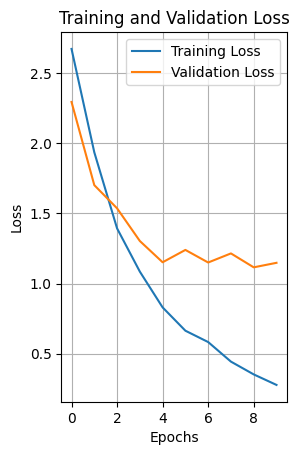

In [23]:
# Training and Validation Loss
plt.figure()
plt.subplot(1,2,1)
plt.plot(history.history["loss"], label= "Training Loss")
plt.plot(history.history["val_loss"], label = "Validation Loss")
plt.title("Training and Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.grid("True")


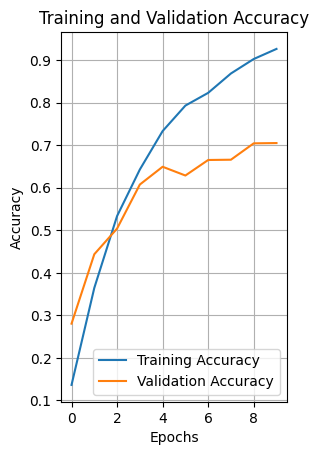

In [24]:
# Training and Validation Accuracy
plt.figure()
plt.subplot(1, 2, 2)
plt.plot(history.history["accuracy"], label="Training Accuracy")
plt.plot(history.history["val_accuracy"], label="Validation Accuracy")
plt.title("Training and Validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.grid("True")